### Stock Price Modeling by Company

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

### Load Dataset

In [3]:
df = pd.read_csv("C:/Users/cerre/Desktop/stock_metrics.csv")
df.head()

,date,ticker,close_lag,close_mean_10_days,close_std_10_days,close_max_10_days,close_mean_30_days,close_std_30_days,close_max_30_days,ema_close_10_days,...,bb_middle_20,bb_upper_50,bb_lower_50,bb_middle_50,timestamp,target,eps_estimate,eps_actual,eps_surprise,surprise_percent
0,2023-02-09,GOOG,100.00,102.095,4.279936,108.8,95.562667,6.426811,108.8,101.018837,...,98.9550,106.364743,83.516857,94.9408,2023-02-09,94.86,NaN,NaN,NaN,NaN
1,2023-02-10,GOOG,95.46,101.510,4.851866,108.8,95.842667,6.195372,108.8,99.899049,...,99.1025,106.352252,83.506148,94.9292,2023-02-10,95.00,NaN,NaN,NaN,NaN
2,2023-02-13,GOOG,94.86,101.215,5.171521,108.8,96.044333,6.060265,108.8,99.008313,...,99.2125,106.067299,83.533101,94.8002,2023-02-13,94.95,NaN,NaN,NaN,NaN
3,2023-02-14,GOOG,95.00,100.723,5.534962,108.8,96.251667,5.905830,108.8,98.270438,...,99.3520,105.784692,83.562508,94.6736,2023-02-14,97.10,NaN,NaN,NaN,NaN
4,2023-02-15,GOOG,94.95,100.290,5.641844,108.8,96.498333,5.775859,108.8,98.057631,...,99.6180,105.590827,83.607173,94.5990,2023-02-15,95.78,NaN,NaN,NaN,NaN


###  Preprocessing

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("C:/Users/cerre/Desktop/stock_metrics.csv")

companies = ['AAPL', 'GOOG', 'QCOM']
leaky_cols = ['eps_estimate', 'eps_actual', 'eps_surprise', 'surprise_percent']

preprocessed_data = []

for company in companies:
    df_company = df[df['ticker'] == company].copy()
    if len(df_company) == 0:
        print(f" No data for {company}, skipping.")
        continue

    df_company.fillna(0, inplace=True)

    X = df_company.drop(columns=["target", "date", "timestamp", "ticker"] + leaky_cols)
    y = df_company["target"]

    #  shuffle=False to keep time order intact
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, shuffle=False
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    preprocessed_data.append({
        "company": company,
        "X_train": X_train_scaled,
        "X_test": X_test_scaled,
        "y_train": y_train.reset_index(drop=True),
        "y_test": y_test.reset_index(drop=True)
    })


### Model Training and Evaluation


Training models for AAPL...
R² score of Linear Regression for AAPL: 0.9592
R² score of XGBoost Regression for AAPL: -0.7879


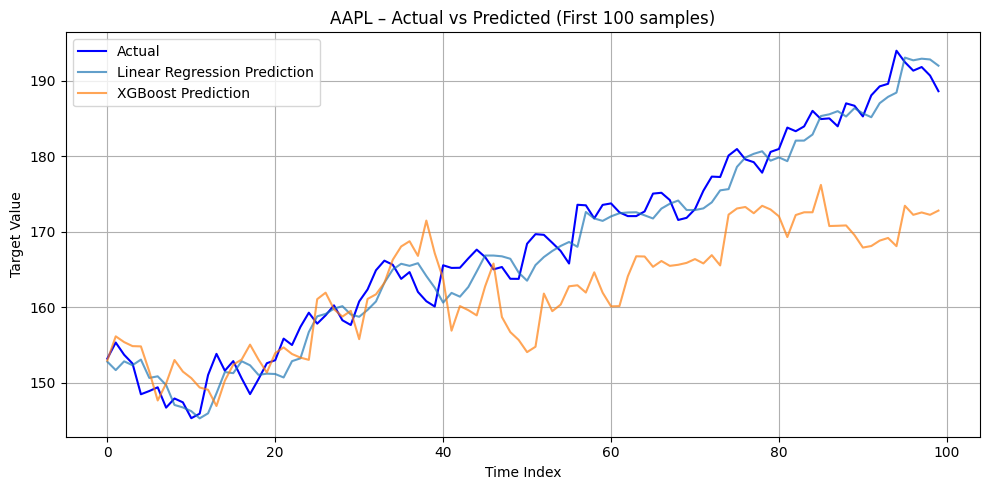


Training models for GOOG...
R² score of Linear Regression for GOOG: 0.9741
R² score of XGBoost Regression for GOOG: 0.8740


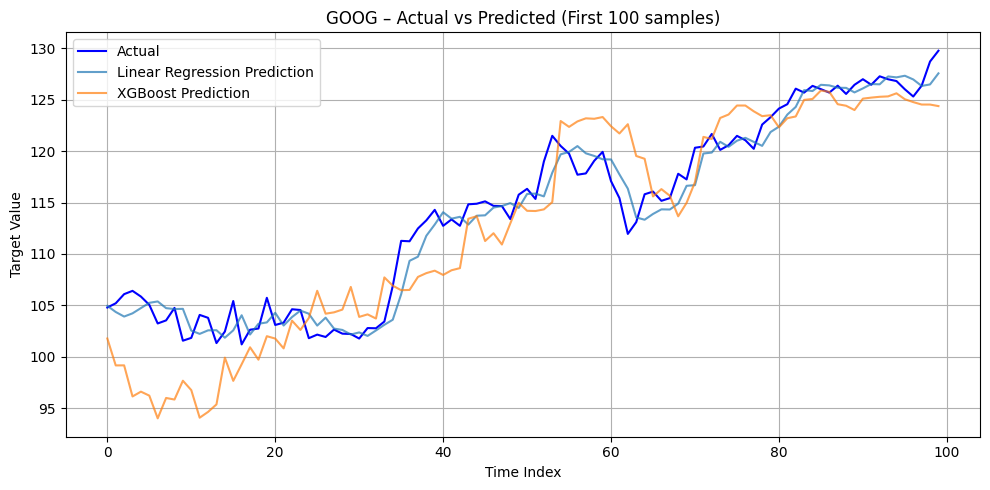


Training models for QCOM...
R² score of Linear Regression for QCOM: 0.8775
R² score of XGBoost Regression for QCOM: 0.7613


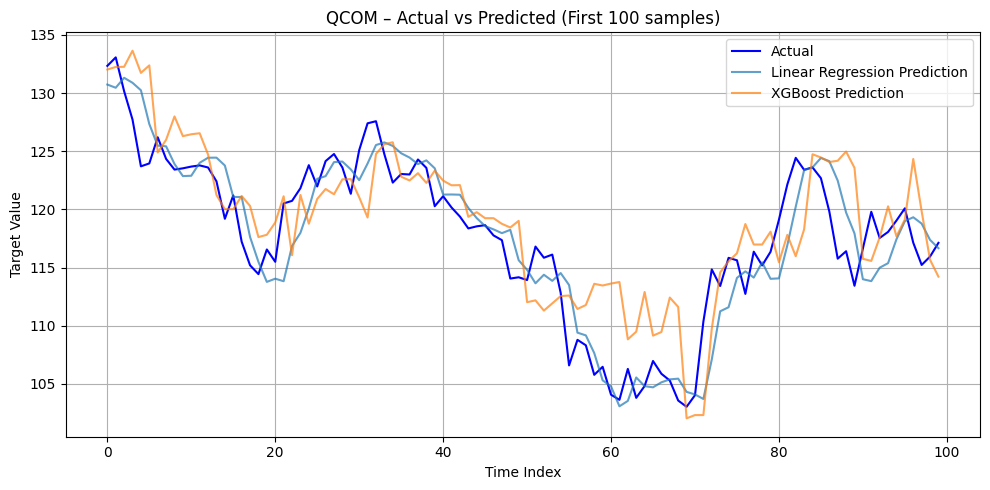

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

for data in preprocessed_data:
    company = data["company"]
    X_train, X_test = data["X_train"], data["X_test"]
    y_train, y_test = data["y_train"], data["y_test"]

    print(f"\nTraining models for {company}...")

    # Linear Regression
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    r2_lr = r2_score(y_test, y_pred_lr)

    # XGBoost Regression
    xgb = XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
    xgb.fit(X_train, y_train)
    y_pred_xgb = xgb.predict(X_test)
    r2_xgb = r2_score(y_test, y_pred_xgb)

    print(f"R² score of Linear Regression for {company}: {r2_lr:.4f}")
    print(f"R² score of XGBoost Regression for {company}: {r2_xgb:.4f}")

    # Plot actual vs predicted for first 100 samples
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.values[:100], label="Actual", color="blue")
    plt.plot(y_pred_lr[:100], label="Linear Regression Prediction", alpha=0.7)
    plt.plot(y_pred_xgb[:100], label="XGBoost Prediction", alpha=0.7)
    plt.title(f"{company} – Actual vs Predicted (First 100 samples)")
    plt.xlabel("Time Index")
    plt.ylabel("Target Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


 AAPL Linear Regression


Training Linear Regression for AAPL...
R² score for Linear Regression (AAPL): 0.9592


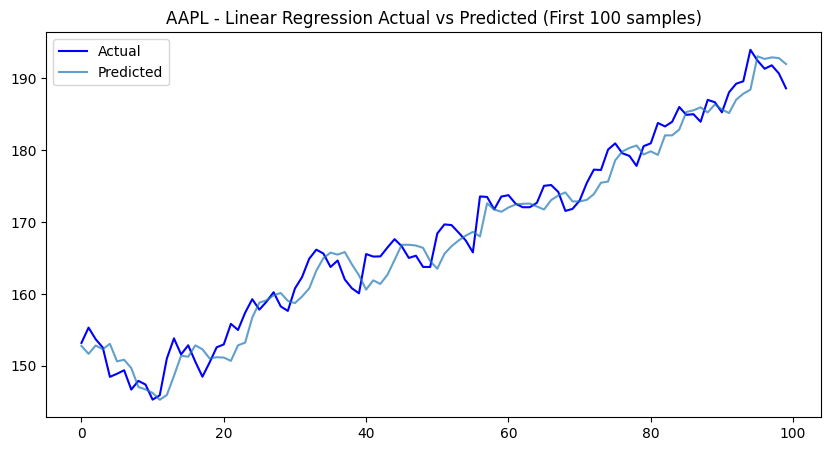

In [6]:
company = "AAPL"
data = next(item for item in preprocessed_data if item["company"] == company)

X_train, X_test = data["X_train"], data["X_test"]
y_train, y_test = data["y_train"], data["y_test"]

print(f"\nTraining Linear Regression for {company}...")

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"R² score for Linear Regression ({company}): {r2_lr:.4f}")

plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label="Actual", color="blue")
plt.plot(y_pred_lr[:100], label="Predicted", alpha=0.7)
plt.title(f"{company} - Linear Regression Actual vs Predicted (First 100 samples)")
plt.legend()
plt.show()


 AAPL XGBoost


Training XGBoost for AAPL...
R² score for XGBoost (AAPL): -0.7879


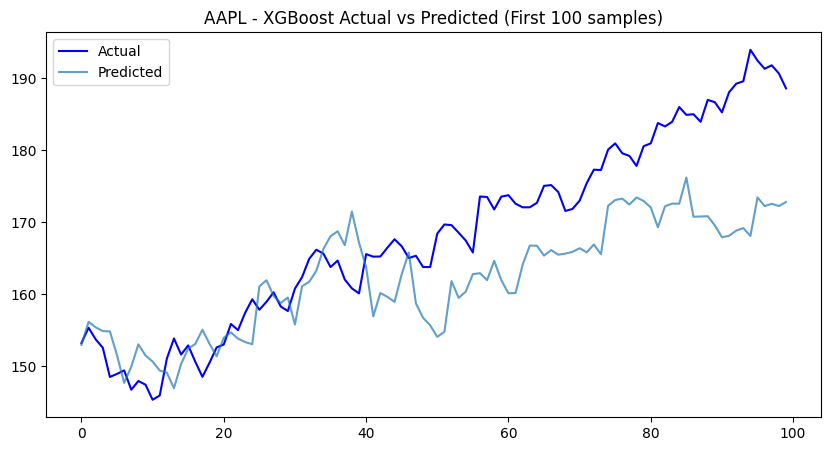

In [7]:
from xgboost import XGBRegressor

print(f"\nTraining XGBoost for {company}...")

xgb = XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"R² score for XGBoost ({company}): {r2_xgb:.4f}")

plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label="Actual", color="blue")
plt.plot(y_pred_xgb[:100], label="Predicted", alpha=0.7)
plt.title(f"{company} - XGBoost Actual vs Predicted (First 100 samples)")
plt.legend()
plt.show()

 AAPL Random Forest


Training Random Forest for AAPL...
R² score for Random Forest (AAPL): -0.6792


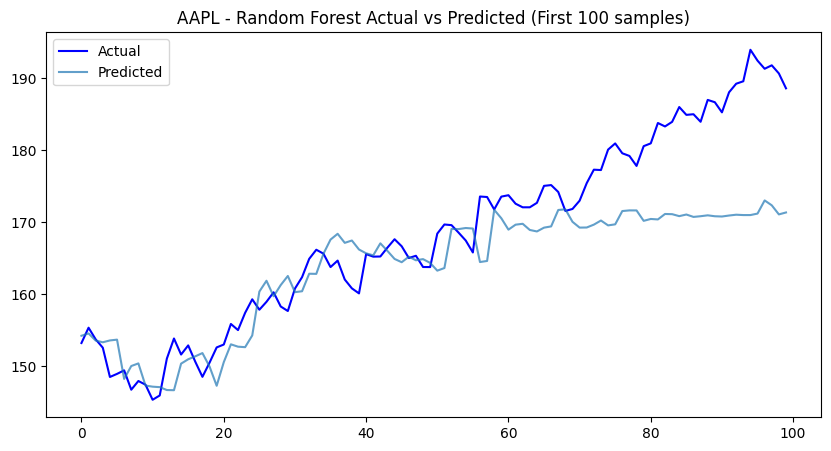

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

company = "AAPL"
data = next(item for item in preprocessed_data if item["company"] == company)

X_train, X_test = data["X_train"], data["X_test"]
y_train, y_test = data["y_train"], data["y_test"]

print(f"\nTraining Random Forest for {company}...")

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"R² score for Random Forest ({company}): {r2_rf:.4f}")

plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label="Actual", color="blue")
plt.plot(y_pred_rf[:100], label="Predicted", alpha=0.7)
plt.title(f"{company} - Random Forest Actual vs Predicted (First 100 samples)")
plt.legend()
plt.show()


 QCOM  Linear Regression


Training Linear Regression for QCOM...
R² score for Linear Regression (QCOM): 0.8775


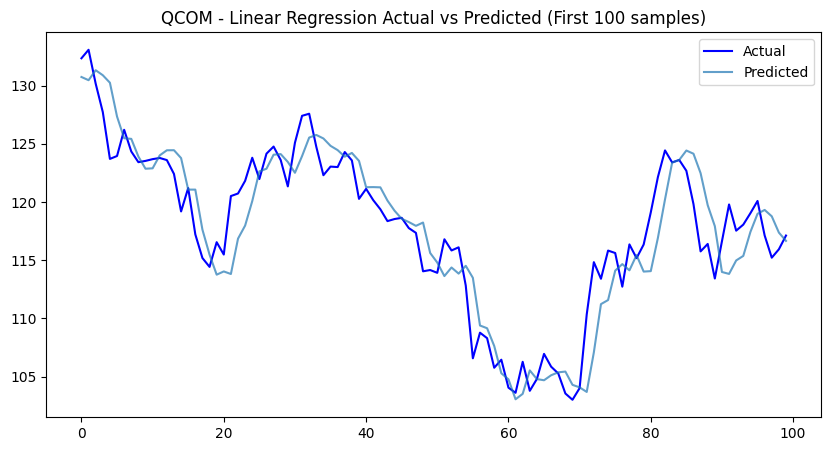

In [9]:
company = "QCOM"
data = next(item for item in preprocessed_data if item["company"] == company)

X_train, X_test = data["X_train"], data["X_test"]
y_train, y_test = data["y_train"], data["y_test"]

print(f"\nTraining Linear Regression for {company}...")

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"R² score for Linear Regression ({company}): {r2_lr:.4f}")

plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label="Actual", color="blue")
plt.plot(y_pred_lr[:100], label="Predicted", alpha=0.7)
plt.title(f"{company} - Linear Regression Actual vs Predicted (First 100 samples)")
plt.legend()
plt.show()


QCOM XGBoost


Training XGBoost for QCOM...
R² score for XGBoost (QCOM): 0.7613


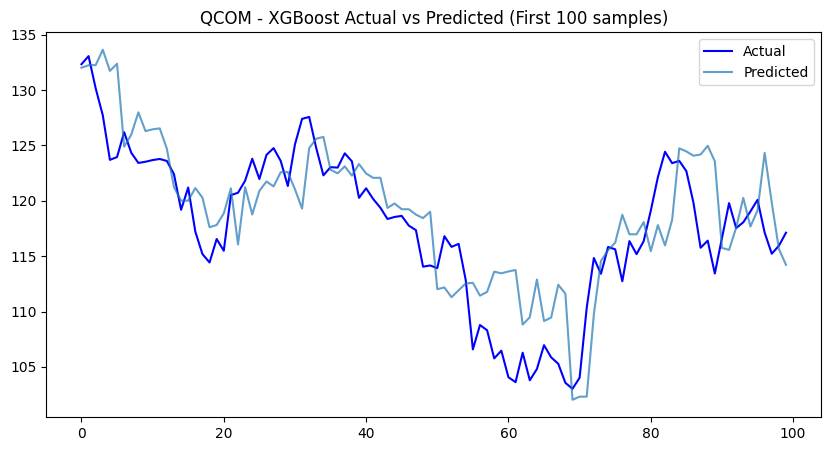

In [10]:
print(f"\nTraining XGBoost for {company}...")

xgb = XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"R² score for XGBoost ({company}): {r2_xgb:.4f}")

plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label="Actual", color="blue")
plt.plot(y_pred_xgb[:100], label="Predicted", alpha=0.7)
plt.title(f"{company} - XGBoost Actual vs Predicted (First 100 samples)")
plt.legend()
plt.show()

QCOM Random Forest


Training Random Forest for QCOM...
R² score for Random Forest (QCOM): 0.7928


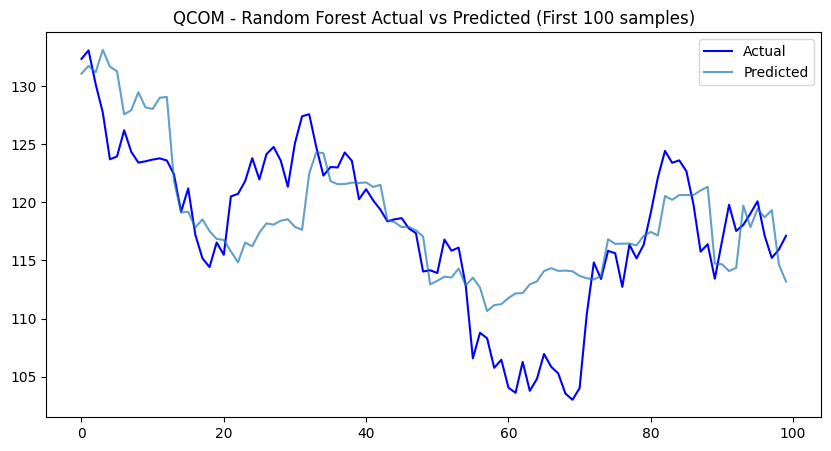

In [11]:
company = "QCOM"
data = next(item for item in preprocessed_data if item["company"] == company)

X_train, X_test = data["X_train"], data["X_test"]
y_train, y_test = data["y_train"], data["y_test"]

print(f"\nTraining Random Forest for {company}...")

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"R² score for Random Forest ({company}): {r2_rf:.4f}")

plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label="Actual", color="blue")
plt.plot(y_pred_rf[:100], label="Predicted", alpha=0.7)
plt.title(f"{company} - Random Forest Actual vs Predicted (First 100 samples)")
plt.legend()
plt.show()

In [12]:
print(df['ticker'].unique())


['GOOG' 'QCOM' 'AAPL']


GOOG Linear Regssion

R² score for Linear Regression: 0.8775


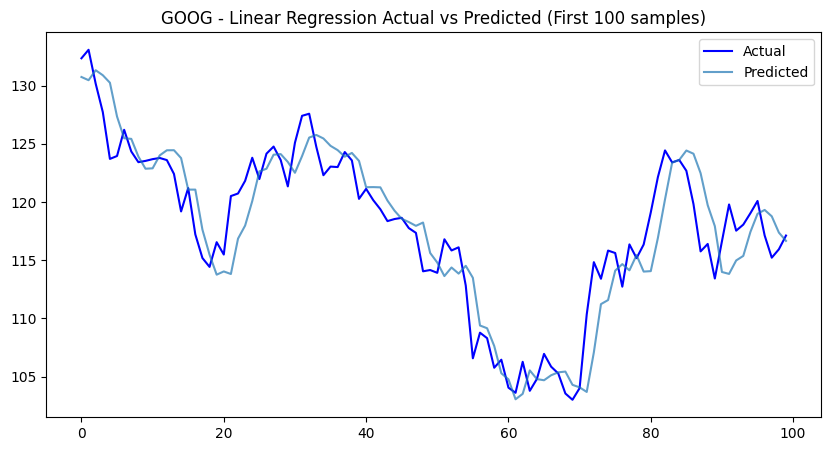

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"R² score for Linear Regression: {r2_lr:.4f}")

plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label="Actual", color="blue")
plt.plot(y_pred_lr[:100], label="Predicted", alpha=0.7)
plt.title("GOOG - Linear Regression Actual vs Predicted (First 100 samples)")
plt.legend()
plt.show()


GOOG XGboost

R² score for XGBoost: 0.7613


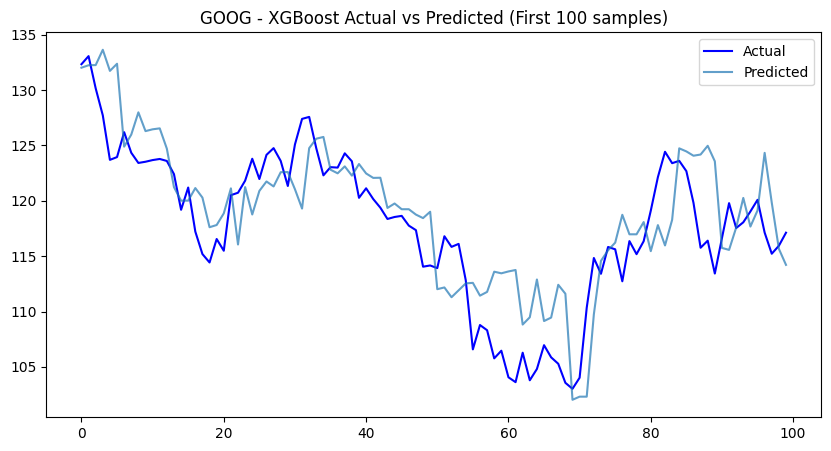

In [14]:
from xgboost import XGBRegressor

xgb = XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"R² score for XGBoost: {r2_xgb:.4f}")

plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label="Actual", color="blue")
plt.plot(y_pred_xgb[:100], label="Predicted", alpha=0.7)
plt.title("GOOG - XGBoost Actual vs Predicted (First 100 samples)")
plt.legend()
plt.show()


GOOG RandomForest

R² score for Random Forest: 0.7928


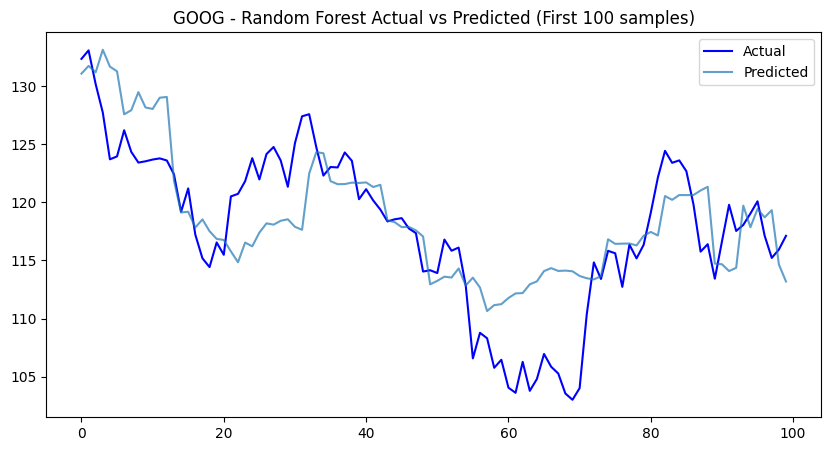

In [15]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"R² score for Random Forest: {r2_rf:.4f}")

plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label="Actual", color="blue")
plt.plot(y_pred_rf[:100], label="Predicted", alpha=0.7)
plt.title("GOOG - Random Forest Actual vs Predicted (First 100 samples)")
plt.legend()
plt.show()


Hyperparameter Tuning for XGBoost and Random Forest

In [16]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

data = next(item for item in preprocessed_data if item["company"] == "AAPL")
X_train, y_train = data["X_train"], data["y_train"]

# XGBoost parameter grid
xgb = XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [2, 3, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

xgb_grid = GridSearchCV(xgb, xgb_param_grid, cv=3, scoring='r2', n_jobs=-1)
xgb_grid.fit(X_train, y_train)

print("AAPL - Best XGBoost params:", xgb_grid.best_params_)
print("AAPL - Best XGBoost CV R2:", xgb_grid.best_score_)

# Random Forest parameter grid
rf = RandomForestRegressor(random_state=42)
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(rf, rf_param_grid, cv=3, scoring='r2', n_jobs=-1)
rf_grid.fit(X_train, y_train)

print("AAPL - Best RF params:", rf_grid.best_params_)
print("AAPL - Best RF CV R2:", rf_grid.best_score_)


AAPL - Best XGBoost params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}
AAPL - Best XGBoost CV R2: -4.012324570012467
AAPL - Best RF params: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}
AAPL - Best RF CV R2: -3.5776200538673444


 TimeSeriesSplit Cross-Validation for Hyperparameter Tuning

In [17]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

data = next(item for item in preprocessed_data if item["company"] == "AAPL")
X_train, y_train = data["X_train"], data["y_train"]

tscv = TimeSeriesSplit(n_splits=3)

# XGBoost parameter grid
xgb = XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [2, 3, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

xgb_grid = GridSearchCV(xgb, xgb_param_grid, cv=tscv, scoring='r2', n_jobs=-1)
xgb_grid.fit(X_train, y_train)

print("Best XGBoost params (TimeSeriesSplit):", xgb_grid.best_params_)
print("Best XGBoost CV R2 (TimeSeriesSplit):", xgb_grid.best_score_)

# Random Forest parameter grid
rf = RandomForestRegressor(random_state=42)
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(rf, rf_param_grid, cv=tscv, scoring='r2', n_jobs=-1)
rf_grid.fit(X_train, y_train)

print("Best RF params (TimeSeriesSplit):", rf_grid.best_params_)
print("Best RF CV R2 (TimeSeriesSplit):", rf_grid.best_score_)


Best XGBoost params (TimeSeriesSplit): {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
Best XGBoost CV R2 (TimeSeriesSplit): -1.4733058154455592
Best RF params (TimeSeriesSplit): {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 150}
Best RF CV R2 (TimeSeriesSplit): -1.5185193971933322


Trying Simpler Linear Models: Linear Regression and Ridge Regression

Linear Regression R² score: 0.9592
Ridge Regression R² score: 0.9552


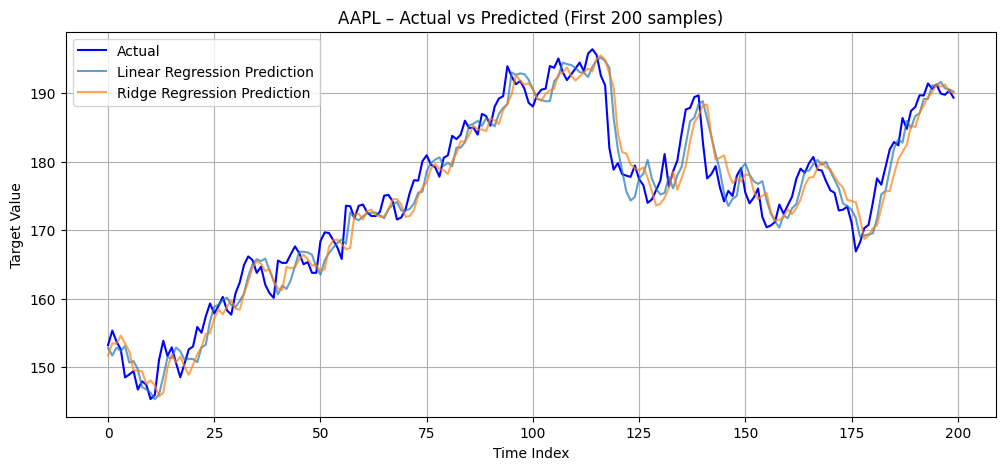

In [18]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

data = next(item for item in preprocessed_data if item["company"] == "AAPL")
X_train, X_test = data["X_train"], data["X_test"]
y_train, y_test = data["y_train"], data["y_test"]

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression R² score: {r2_lr:.4f}")

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression R² score: {r2_ridge:.4f}")

plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:200], label="Actual", color="blue")
plt.plot(y_pred_lr[:200], label="Linear Regression Prediction", alpha=0.7)
plt.plot(y_pred_ridge[:200], label="Ridge Regression Prediction", alpha=0.7)
plt.title("AAPL – Actual vs Predicted (First 200 samples)")
plt.xlabel("Time Index")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)
plt.show()


Test Set Evaluation of Linear and Ridge Regression Models

Linear Regression R² on test set: 0.9592
Ridge Regression R² on test set: 0.9552


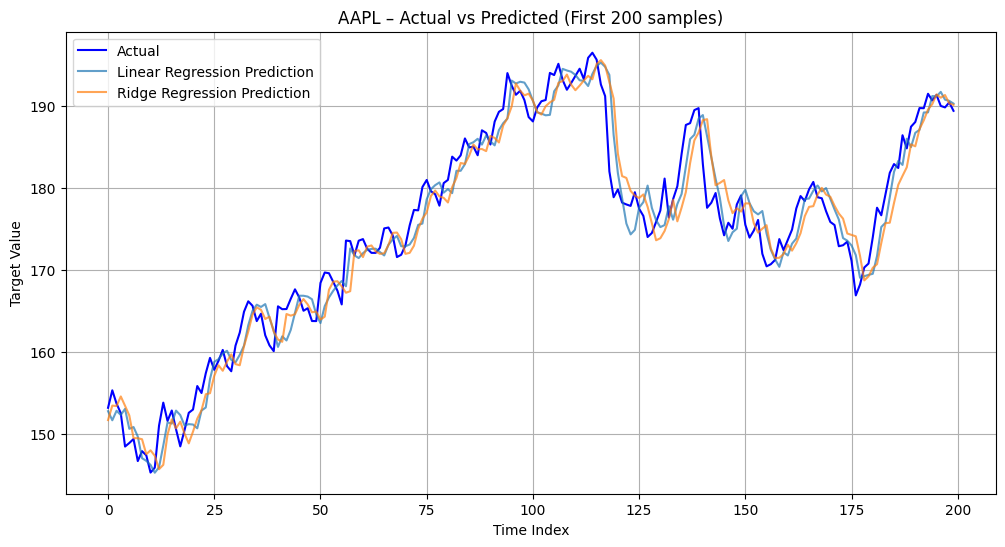

In [19]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

data = next(item for item in preprocessed_data if item["company"] == "AAPL")
X_test, y_test = data["X_test"], data["y_test"]

# Linear Regression prediction
y_pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)

# Ridge Regression prediction
y_pred_ridge = ridge.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Linear Regression R² on test set: {r2_lr:.4f}")
print(f"Ridge Regression R² on test set: {r2_ridge:.4f}")

plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:200], label="Actual", color="blue")
plt.plot(y_pred_lr[:200], label="Linear Regression Prediction", alpha=0.7)
plt.plot(y_pred_ridge[:200], label="Ridge Regression Prediction", alpha=0.7)
plt.title("AAPL – Actual vs Predicted (First 200 samples)")
plt.xlabel("Time Index")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)
plt.show()


Residual Analysis for Linear and Ridge Regression

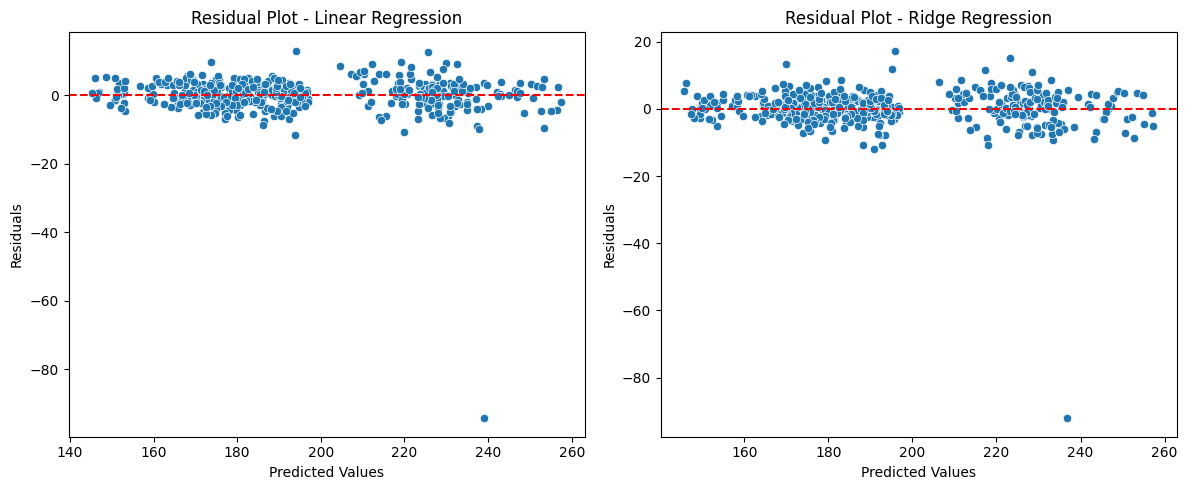

In [20]:
import seaborn as sns

residuals_lr = y_test.values - y_pred_lr
residuals_ridge = y_test.values - y_pred_ridge

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred_lr, y=residuals_lr)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot - Linear Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_pred_ridge, y=residuals_ridge)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot - Ridge Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

plt.tight_layout()
plt.show()


Outlier Detection and Cleaning — Code

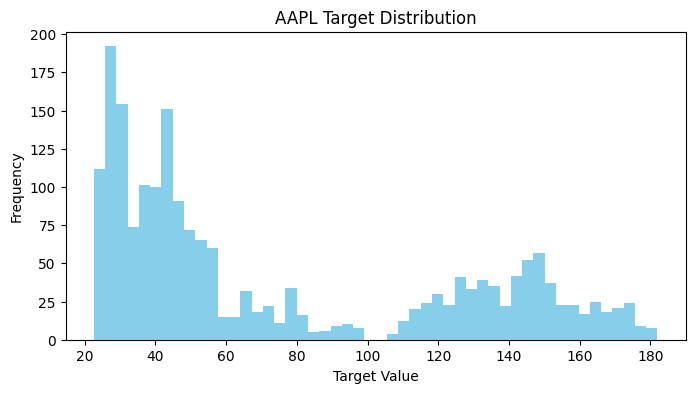

Number of outliers detected: 0


In [21]:
import numpy as np
import matplotlib.pyplot as plt

data = next(item for item in preprocessed_data if item["company"] == "AAPL")
X_train, y_train = data["X_train"], data["y_train"]

plt.figure(figsize=(8,4))
plt.hist(y_train, bins=50, color='skyblue')
plt.title("AAPL Target Distribution")
plt.xlabel("Target Value")
plt.ylabel("Frequency")
plt.show()

mean_target = np.mean(y_train)
std_target = np.std(y_train)

outliers_idx = np.where((y_train < mean_target - 3*std_target) | (y_train > mean_target + 3*std_target))[0]
print(f"Number of outliers detected: {len(outliers_idx)}")

X_train_clean = np.delete(X_train, outliers_idx, axis=0)
y_train_clean = np.delete(y_train, outliers_idx, axis=0)


 Feature Engineering: Creating New Features

In [22]:
import pandas as pd

company = "AAPL"
df_company = df[df['ticker'] == company].copy()
df_company.sort_values('date', inplace=True)

df_company['target_lag_1'] = df_company['target'].shift(1)
df_company['target_roll_mean_7'] = df_company['target'].rolling(window=7).mean()
df_company['target_roll_std_7'] = df_company['target'].rolling(window=7).std()

df_company.dropna(inplace=True)

print(df_company[['target', 'target_lag_1', 'target_roll_mean_7', 'target_roll_std_7']].head(10))


      target  target_lag_1  target_roll_mean_7  target_roll_std_7
5464  222.91        225.91          229.710000           3.953045
5465  222.01        222.91          228.487143           4.862135
5466  223.45        222.01          227.350000           4.993666
5467  222.72        223.45          225.824286           4.437717
5468  227.48        222.72          224.940000           2.996453
5469  226.96        227.48          224.491429           2.233036
5470  224.23        226.96          224.251429           2.143653
5471  224.23        224.23          224.440000           2.062507
5472  225.12        224.23          224.884286           1.765379
5473  228.22        225.12          225.565714           2.021500


Preprocessing — Code

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

leaky_cols = ['eps_estimate', 'eps_actual', 'eps_surprise', 'surprise_percent']

X = df_company.drop(columns=["target", "date", "timestamp", "ticker"] + leaky_cols)
y = df_company["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Model Training and Evaluation — Markdown

Linear Regression R²: -1.7786
Ridge Regression R²: 0.4495


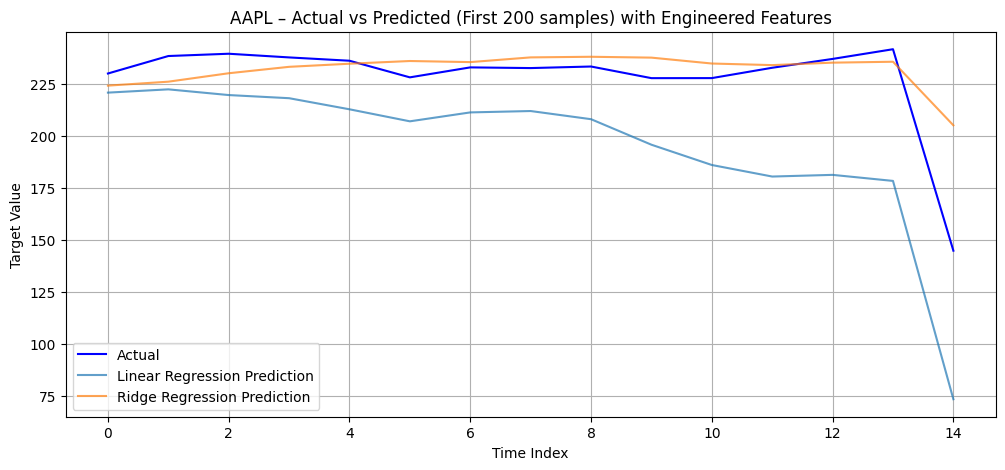

In [24]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
r2_lr = r2_score(y_test, y_pred_lr)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Linear Regression R²: {r2_lr:.4f}")
print(f"Ridge Regression R²: {r2_ridge:.4f}")

plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:200], label="Actual", color="blue")
plt.plot(y_pred_lr[:200], label="Linear Regression Prediction", alpha=0.7)
plt.plot(y_pred_ridge[:200], label="Ridge Regression Prediction", alpha=0.7)
plt.title("AAPL – Actual vs Predicted (First 200 samples) with Engineered Features")
plt.xlabel("Time Index")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)
plt.show()


Residual Analysis

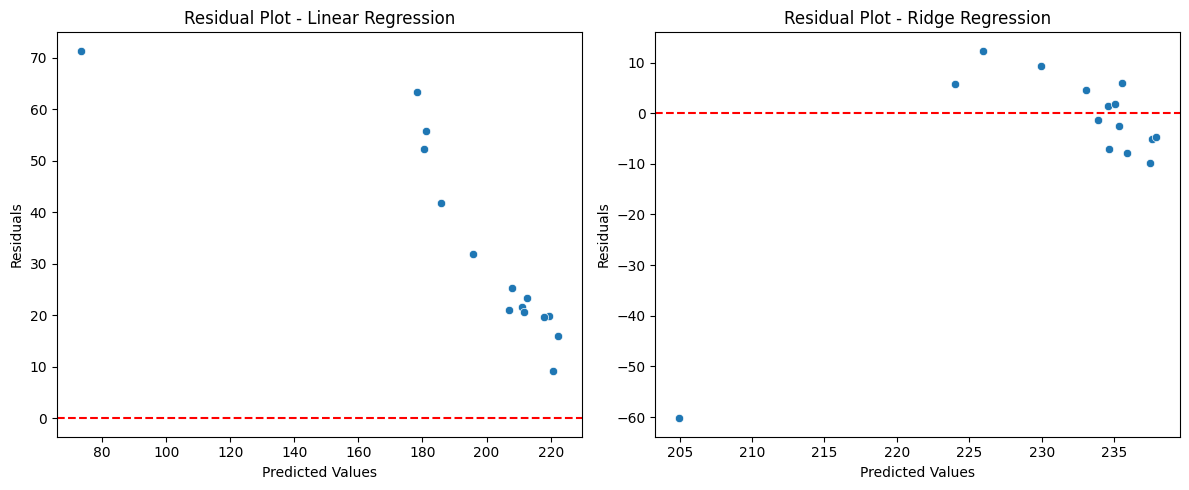

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

residuals_lr = y_test.values - y_pred_lr
residuals_ridge = y_test.values - y_pred_ridge

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred_lr, y=residuals_lr)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot - Linear Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_pred_ridge, y=residuals_ridge)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot - Ridge Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

plt.tight_layout()
plt.show()


Lasso Regression Model


Training Lasso Regression for AAPL...
Lasso Regression R² score for AAPL: 0.9549


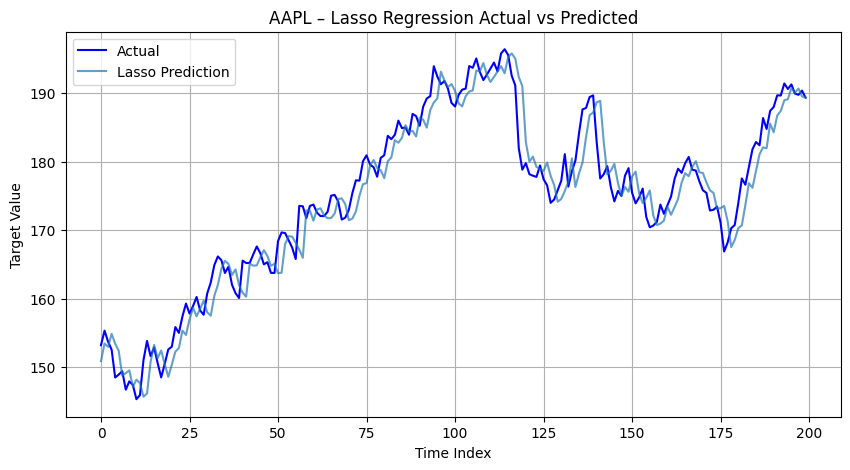


Training Lasso Regression for GOOG...
Lasso Regression R² score for GOOG: 0.9661


c:\Users\cerre\anaconda3\envs\block_d\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.373e+02, tolerance: 4.291e+02
  model = cd_fast.enet_coordinate_descent(


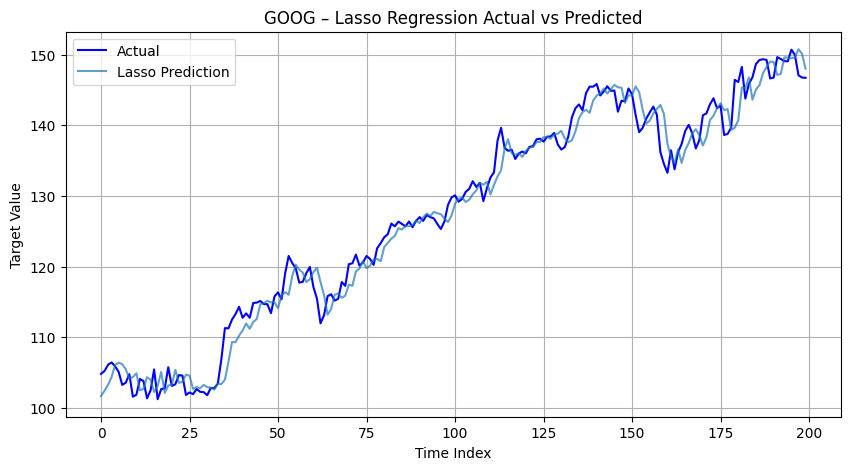


Training Lasso Regression for QCOM...
Lasso Regression R² score for QCOM: 0.8708


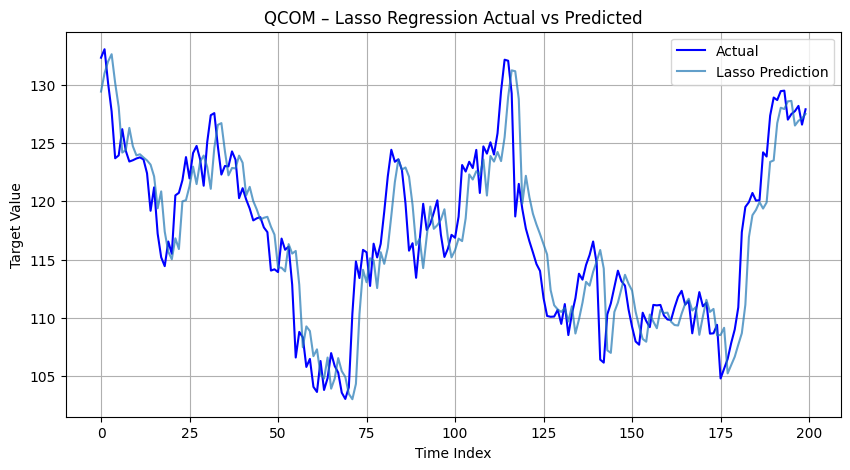

In [26]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

companies = ['AAPL', 'GOOG', 'QCOM']

for company in companies:
    data = next(item for item in preprocessed_data if item["company"] == company)
    X_train, X_test = data["X_train"], data["X_test"]
    y_train, y_test = data["y_train"], data["y_test"]

    print(f"\nTraining Lasso Regression for {company}...")

    lasso = Lasso(alpha=0.1)
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)
    r2_lasso = r2_score(y_test, y_pred_lasso)

    print(f"Lasso Regression R² score for {company}: {r2_lasso:.4f}")

    plt.figure(figsize=(10, 5))
    plt.plot(y_test.values[:200], label="Actual", color="blue")
    plt.plot(y_pred_lasso[:200], label="Lasso Prediction", alpha=0.7)
    plt.title(f"{company} – Lasso Regression Actual vs Predicted")
    plt.xlabel("Time Index")
    plt.ylabel("Target Value")
    plt.legend()
    plt.grid(True)
    plt.show()


SVR for Each Company


Training SVR for AAPL...
SVR R² score for AAPL: -5.5800


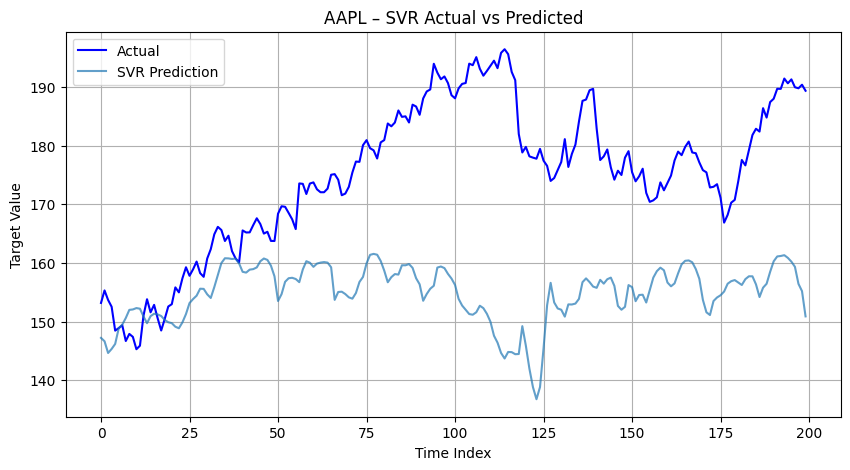


Training SVR for GOOG...
SVR R² score for GOOG: 0.9126


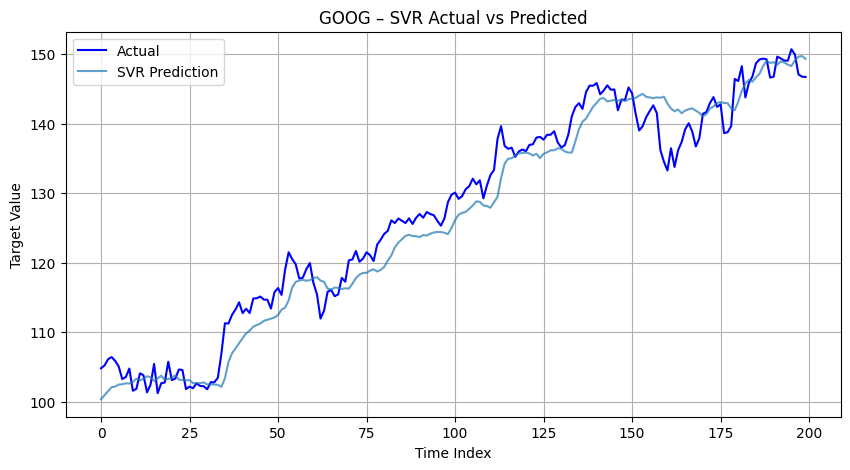


Training SVR for QCOM...
SVR R² score for QCOM: 0.4220


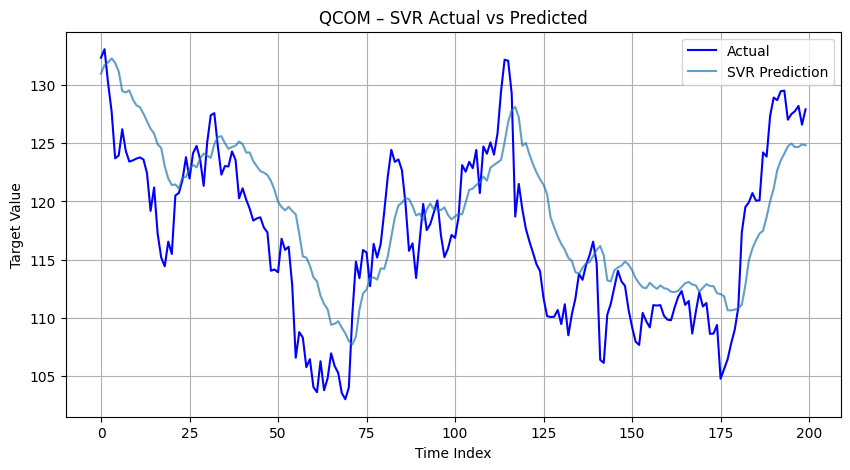

In [27]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

companies = ['AAPL', 'GOOG', 'QCOM']

for company in companies:
    data = next(item for item in preprocessed_data if item["company"] == company)
    X_train, X_test = data["X_train"], data["X_test"]
    y_train, y_test = data["y_train"], data["y_test"]

    print(f"\nTraining SVR for {company}...")

    svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
    svr.fit(X_train, y_train)
    y_pred_svr = svr.predict(X_test)
    r2_svr = r2_score(y_test, y_pred_svr)

    print(f"SVR R² score for {company}: {r2_svr:.4f}")

    plt.figure(figsize=(10, 5))
    plt.plot(y_test.values[:200], label="Actual", color="blue")
    plt.plot(y_pred_svr[:200], label="SVR Prediction", alpha=0.7)
    plt.title(f"{company} – SVR Actual vs Predicted")
    plt.xlabel("Time Index")
    plt.ylabel("Target Value")
    plt.legend()
    plt.grid(True)
    plt.show()


Hyperparameter Tuning for Lasso and SVR


In [28]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import Lasso
from sklearn.svm import SVR

data = next(item for item in preprocessed_data if item["company"] == "AAPL")
X_train, y_train = data["X_train"], data["y_train"]

tscv = TimeSeriesSplit(n_splits=3)

# Lasso hyperparameter grid
lasso = Lasso()
lasso_param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10]
}

lasso_grid = GridSearchCV(lasso, lasso_param_grid, cv=tscv, scoring='r2', n_jobs=-1)
lasso_grid.fit(X_train, y_train)

print("Best Lasso params:", lasso_grid.best_params_)
print("Best Lasso CV R2:", lasso_grid.best_score_)

# SVR hyperparameter grid
svr = SVR(kernel='rbf')
svr_param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
    'gamma': ['scale', 'auto']
}

svr_grid = GridSearchCV(svr, svr_param_grid, cv=tscv, scoring='r2', n_jobs=-1)
svr_grid.fit(X_train, y_train)

print("Best SVR params:", svr_grid.best_params_)
print("Best SVR CV R2:", svr_grid.best_score_)


c:\Users\cerre\anaconda3\envs\block_d\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.101e+03, tolerance: 4.897e+02
  model = cd_fast.enet_coordinate_descent(


Best Lasso params: {'alpha': 0.001}
Best Lasso CV R2: 0.9616033765906207
Best SVR params: {'C': 10, 'epsilon': 0.5, 'gamma': 'auto'}
Best SVR CV R2: -1.0553990130534918


Lasso Test R²: 0.9548


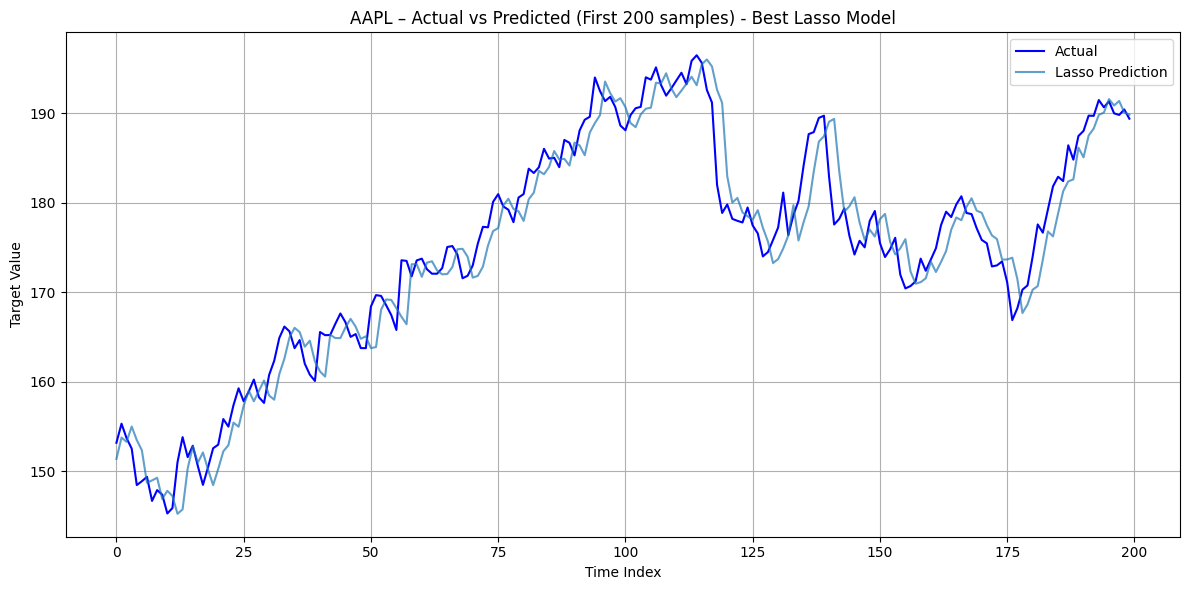

In [29]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

data = next(item for item in preprocessed_data if item["company"] == "AAPL")
X_test, y_test = data["X_test"], data["y_test"]

best_lasso = lasso_grid.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)
r2_lasso_test = r2_score(y_test, y_pred_lasso)

print(f"Lasso Test R²: {r2_lasso_test:.4f}")

plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:200], label="Actual", color="blue")
plt.plot(y_pred_lasso[:200], label="Lasso Prediction", alpha=0.7)
plt.title("AAPL – Actual vs Predicted (First 200 samples) - Best Lasso Model")
plt.xlabel("Time Index")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [30]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import Lasso

data_goog = next(item for item in preprocessed_data if item["company"] == "GOOG")
X_train_goog, y_train_goog = data_goog["X_train"], data_goog["y_train"]

tscv = TimeSeriesSplit(n_splits=3)

lasso = Lasso()
lasso_param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

lasso_grid_goog = GridSearchCV(lasso, lasso_param_grid, cv=tscv, scoring='r2', n_jobs=-1)
lasso_grid_goog.fit(X_train_goog, y_train_goog)

print("GOOG Best Lasso params:", lasso_grid_goog.best_params_)
print("GOOG Best Lasso CV R2:", lasso_grid_goog.best_score_)


GOOG Best Lasso params: {'alpha': 0.001}
GOOG Best Lasso CV R2: 0.8678608103829871


c:\Users\cerre\anaconda3\envs\block_d\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.853e+03, tolerance: 4.291e+02
  model = cd_fast.enet_coordinate_descent(


GOOG Lasso Test R²: 0.9651


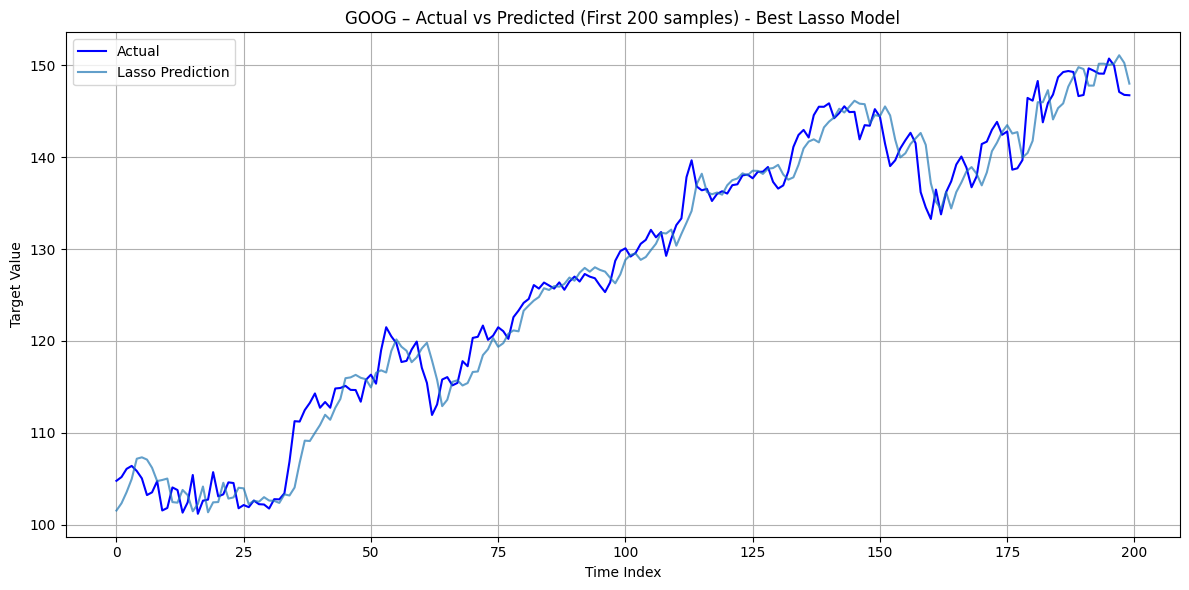

In [31]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

X_test_goog, y_test_goog = data_goog["X_test"], data_goog["y_test"]

best_lasso_goog = lasso_grid_goog.best_estimator_
y_pred_lasso_goog = best_lasso_goog.predict(X_test_goog)
r2_lasso_test_goog = r2_score(y_test_goog, y_pred_lasso_goog)

print(f"GOOG Lasso Test R²: {r2_lasso_test_goog:.4f}")

plt.figure(figsize=(12, 6))
plt.plot(y_test_goog.values[:200], label="Actual", color="blue")
plt.plot(y_pred_lasso_goog[:200], label="Lasso Prediction", alpha=0.7)
plt.title("GOOG – Actual vs Predicted (First 200 samples) - Best Lasso Model")
plt.xlabel("Time Index")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [32]:
data_qcom = next(item for item in preprocessed_data if item["company"] == "QCOM")
X_train_qcom, y_train_qcom = data_qcom["X_train"], data_qcom["y_train"]

lasso_grid_qcom = GridSearchCV(lasso, lasso_param_grid, cv=tscv, scoring='r2', n_jobs=-1)
lasso_grid_qcom.fit(X_train_qcom, y_train_qcom)

print("QCOM Best Lasso params:", lasso_grid_qcom.best_params_)
print("QCOM Best Lasso CV R2:", lasso_grid_qcom.best_score_)


QCOM Best Lasso params: {'alpha': 0.001}
QCOM Best Lasso CV R2: 0.9560887433460031


c:\Users\cerre\anaconda3\envs\block_d\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.071e+03, tolerance: 2.890e+02
  model = cd_fast.enet_coordinate_descent(


QCOM Lasso Test R²: 0.8703


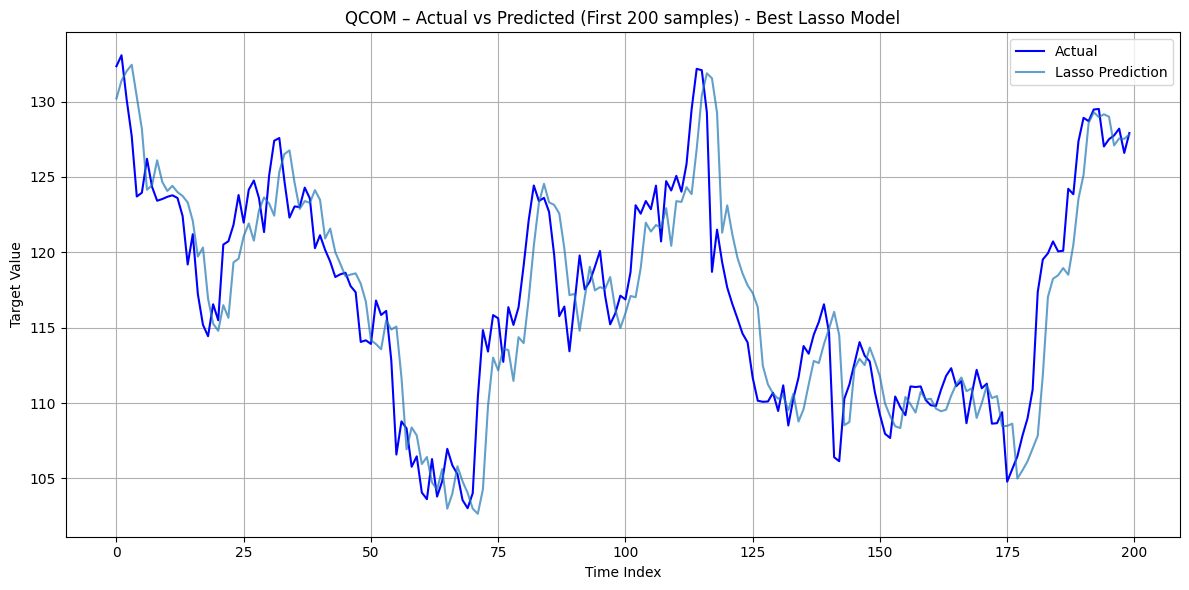

In [33]:
X_test_qcom, y_test_qcom = data_qcom["X_test"], data_qcom["y_test"]

best_lasso_qcom = lasso_grid_qcom.best_estimator_
y_pred_lasso_qcom = best_lasso_qcom.predict(X_test_qcom)
r2_lasso_test_qcom = r2_score(y_test_qcom, y_pred_lasso_qcom)

print(f"QCOM Lasso Test R²: {r2_lasso_test_qcom:.4f}")

plt.figure(figsize=(12, 6))
plt.plot(y_test_qcom.values[:200], label="Actual", color="blue")
plt.plot(y_pred_lasso_qcom[:200], label="Lasso Prediction", alpha=0.7)
plt.title("QCOM – Actual vs Predicted (First 200 samples) - Best Lasso Model")
plt.xlabel("Time Index")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [34]:
pip install shap


Note: you may need to restart the kernel to use updated packages.


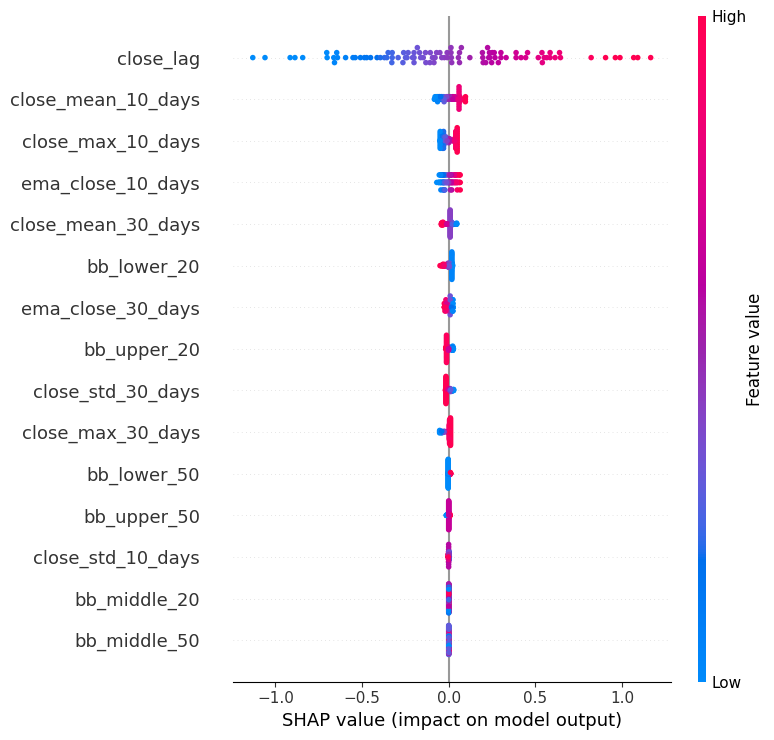

In [35]:
import shap

# Load best model (example: AAPL Lasso)
best_model = lasso_grid.best_estimator_

# Take a sample from training data for faster SHAP calculation
X_train_sample = X_train[:100]

# Create SHAP explainer and compute SHAP values
explainer = shap.Explainer(best_model, X_train_sample)
shap_values = explainer(X_train_sample)

# Plot summary plot
shap.summary_plot(shap_values, X_train_sample, feature_names=X.columns)


In [36]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.


In [37]:
import joblib

models = {
    'linear_regression': lr,
    'ridge_regression': ridge,
    'lasso_regression': lasso_grid.best_estimator_,
}

for name, model in models.items():
    filename = f"{name}_model.pkl"
    joblib.dump(model, filename)
    print(f"{name} saved as {filename}")


linear_regression saved as linear_regression_model.pkl
ridge_regression saved as ridge_regression_model.pkl
lasso_regression saved as lasso_regression_model.pkl
